In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Data Reading, Understanding and Exploration

In [2]:
# importing dataset

df = pd.read_csv('day.csv')

In [3]:
# Checking dataset

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking shape of the dataset

df.shape

(730, 16)

In [5]:
# Checking the dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking if there is any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# we found that 'instant' is an index of the dataset, so our decision is to drop the 'instant' column

df.drop('instant', axis=1, inplace=True)

In [8]:
# we have 'yr', 'mnth' & 'weekday' column in dataset which represents the respective year, month & weekday of the data so our decision is to drop the 'dteday' column.

df.drop('dteday', axis=1, inplace=True)

In [9]:
# we have our target variable column 'cnt' which is the total of 'casual' & 'registered' column, 
# so our decision is to drop that two columns.

df.drop(['casual','registered'], axis=1, inplace=True)

In [10]:
# checking the info of dataset again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
# checking the dataset

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Checking the season column

df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [13]:
# Replacing the values of categorical column 'season' with the given values.

df['season'] = df['season'].replace({1:'spring', 
                                     2:'summer', 
                                     3:'fall', 
                                     4:'winter'})

In [14]:
# Checking the value counts of 'season' column.

df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
# checking that values are replaced or not

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Replacing the values of categorical column 'weathersit' with the given values.

df['weathersit'] = df['weathersit'].replace({1: 'clear_partly_cloudy',
                                             2: 'mist_cloudy',
                                             3: 'light_rain_snow',
                                             4: 'heavy_rain_snow'})

In [17]:
# Checking the value counts of the 'mnth' column

df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [18]:
# Checking the 'weekday' column

df['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [19]:
# Replacing the weekday values with the original values

df['weekday'] = df['weekday'].replace({0:'sunday',
                                       1:'monday',
                                       2:'tuesday',
                                       3:'wednesday',
                                       4:'thursday',
                                       5:'friday',
                                       6:'saturday'})

In [20]:
# Now again checking the dataset to see the operations happened or not

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,monday,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tuesday,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wednesday,1,clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thursday,1,clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,friday,1,clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Data Visualization 

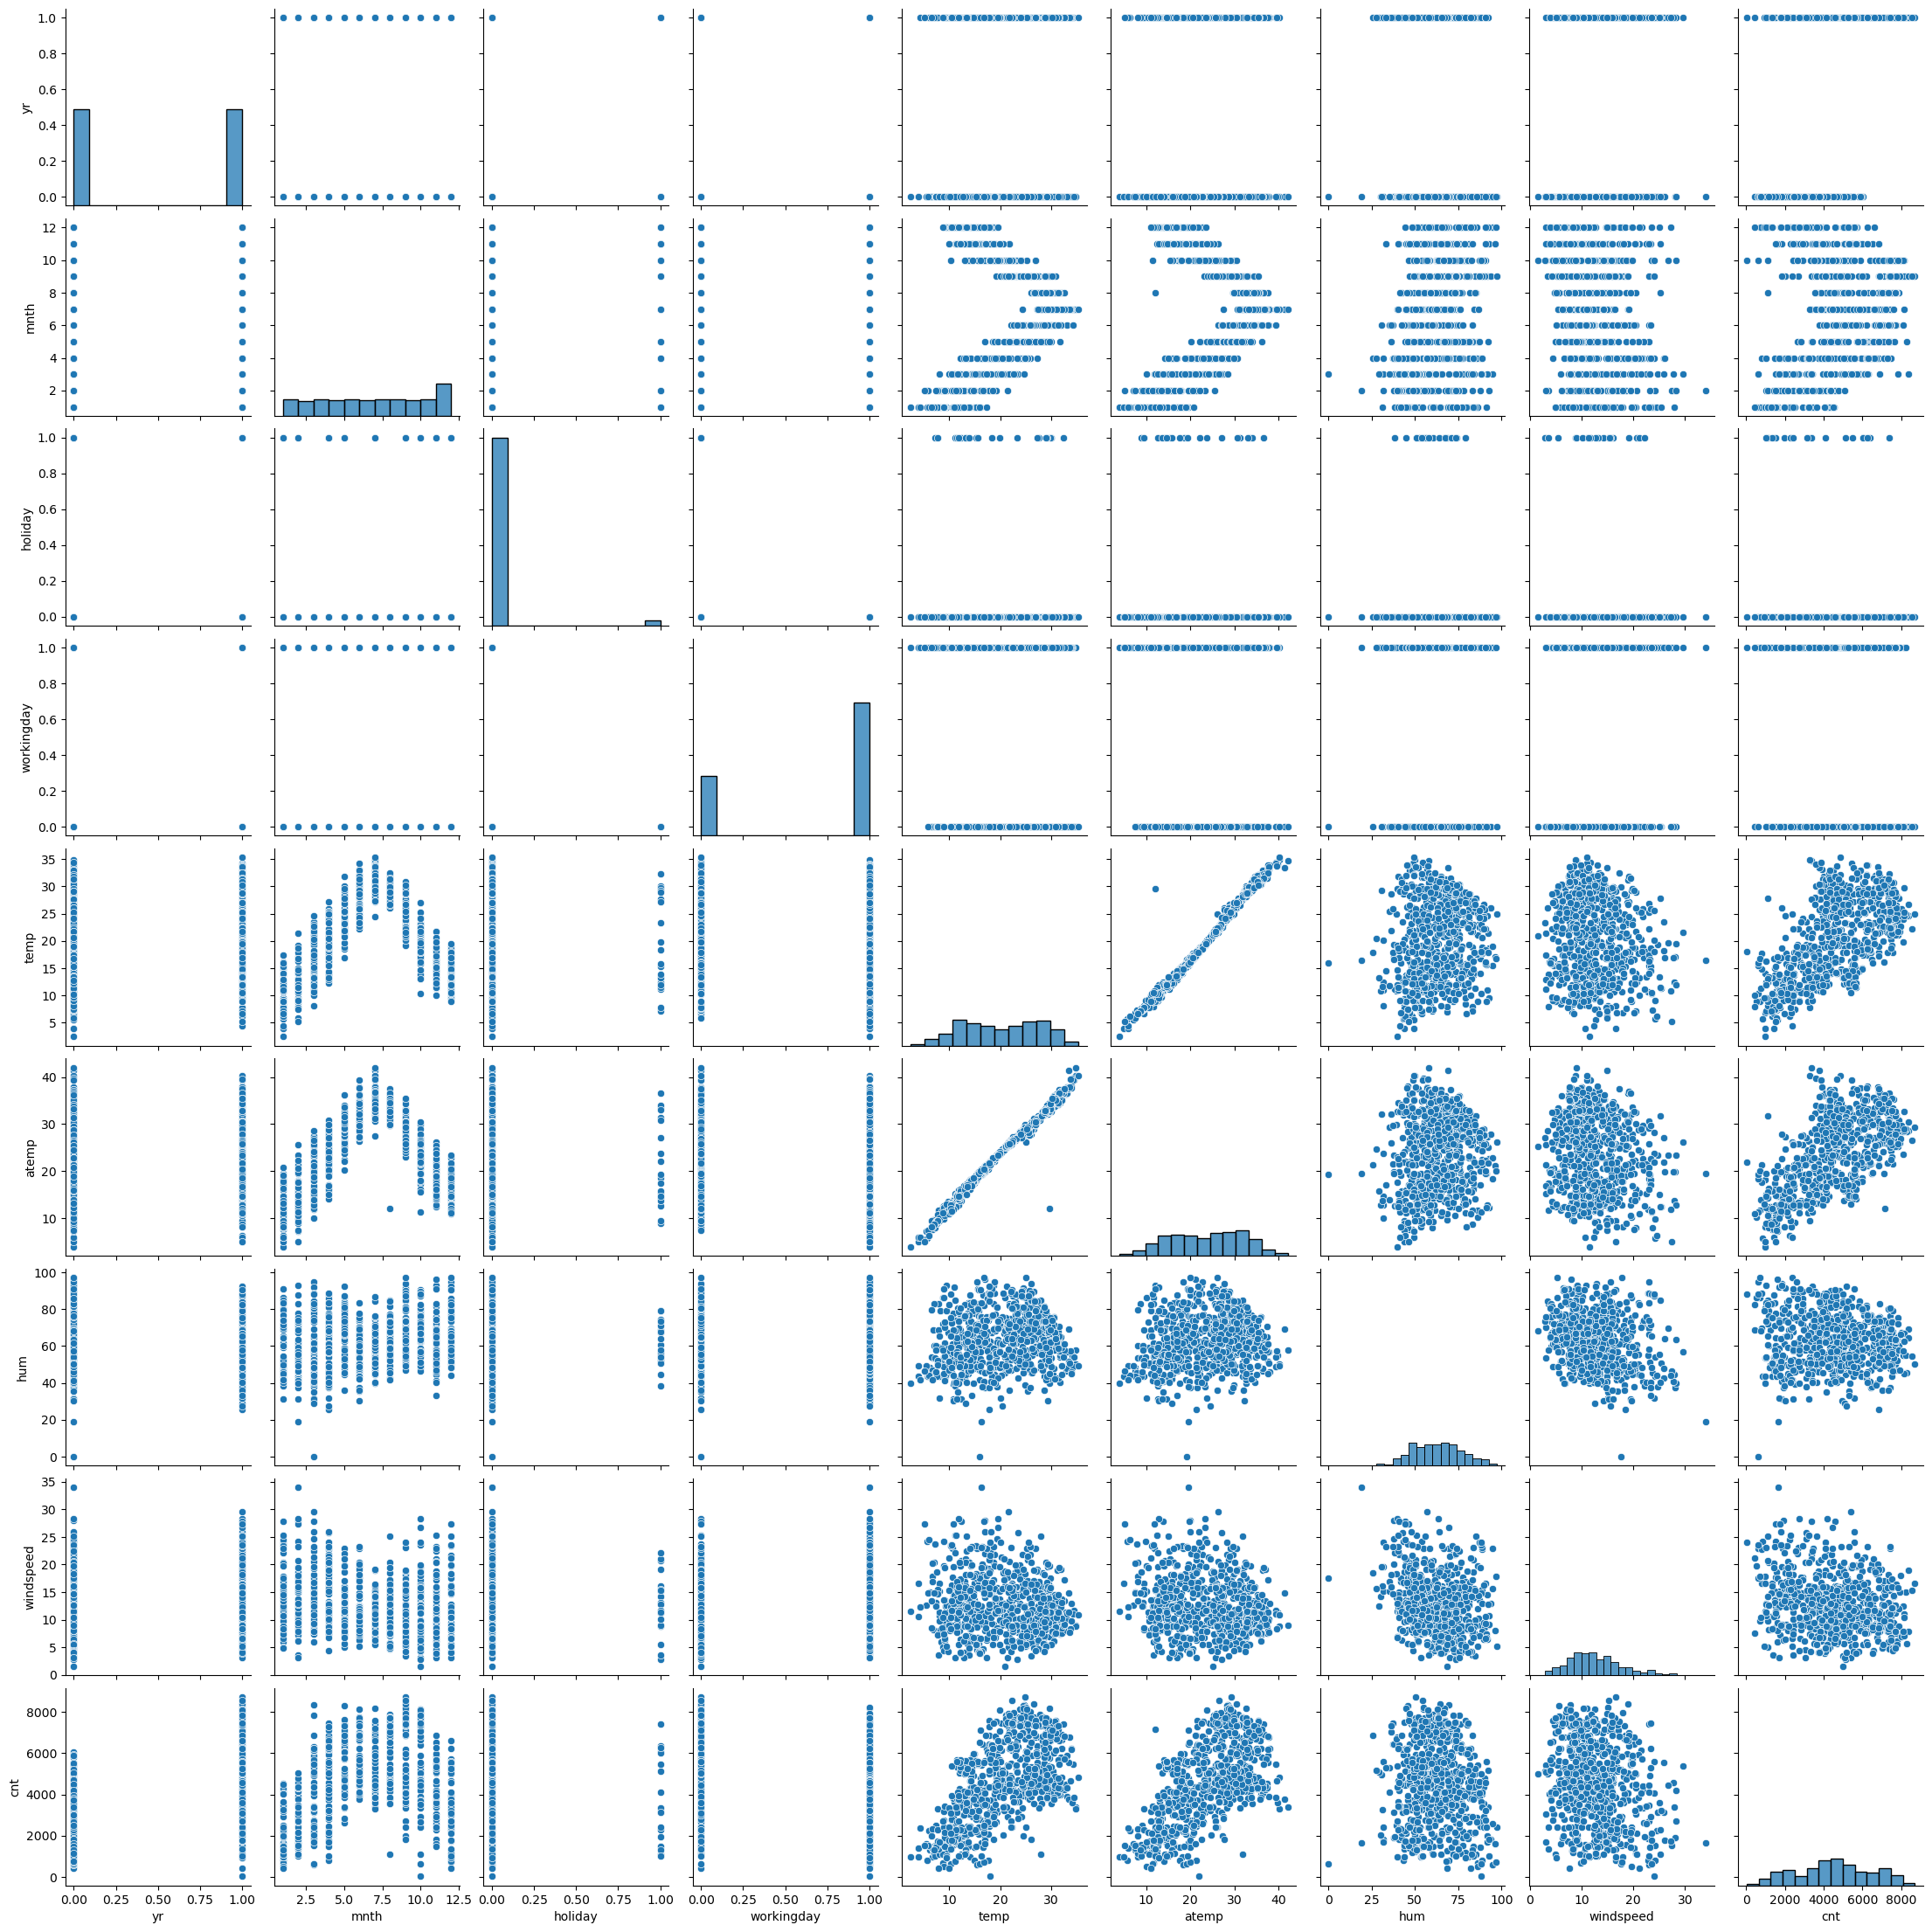

In [22]:
# Plotting pairplot to see the relation between the variables.

sns.pairplot(data=df, vars=['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','cnt'])
plt.show()

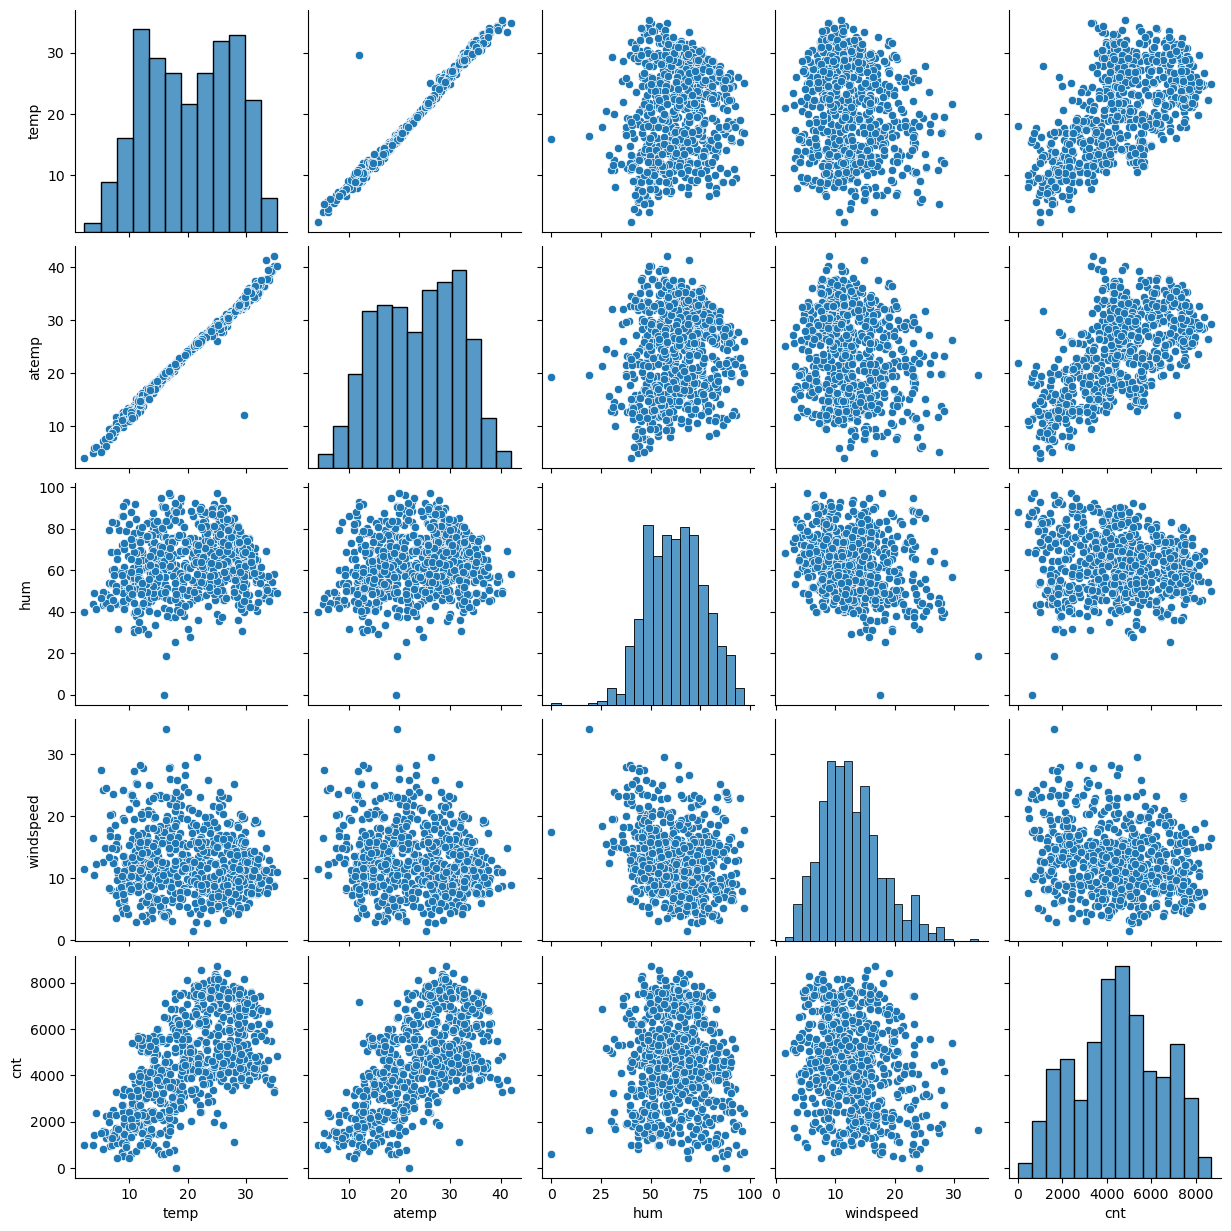

In [23]:
# Plotting pairplot to see the correlation between only numerical variables.

sns.pairplot(data=df, vars= ['temp','atemp','hum','windspeed','cnt'])
plt.show()

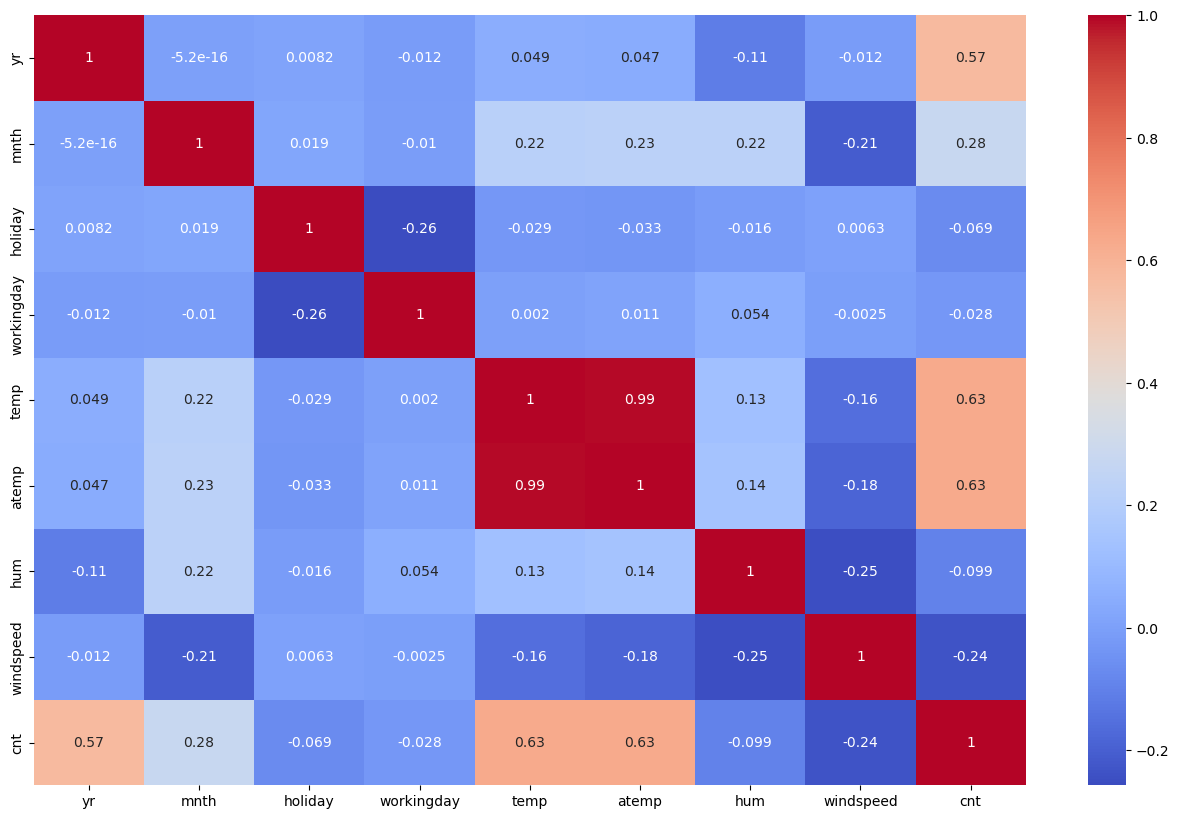

In [24]:
# Checking the correlation between numerical variables only

plt.figure(figsize=[16,10])
sns.heatmap(df[['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
# we found that 'temp' is highly correlated with 'atemp' variable as it shows the correlation 0.99,
# so our decision is to drop the 'temp' column.

df.drop('temp', axis=1, inplace=True)

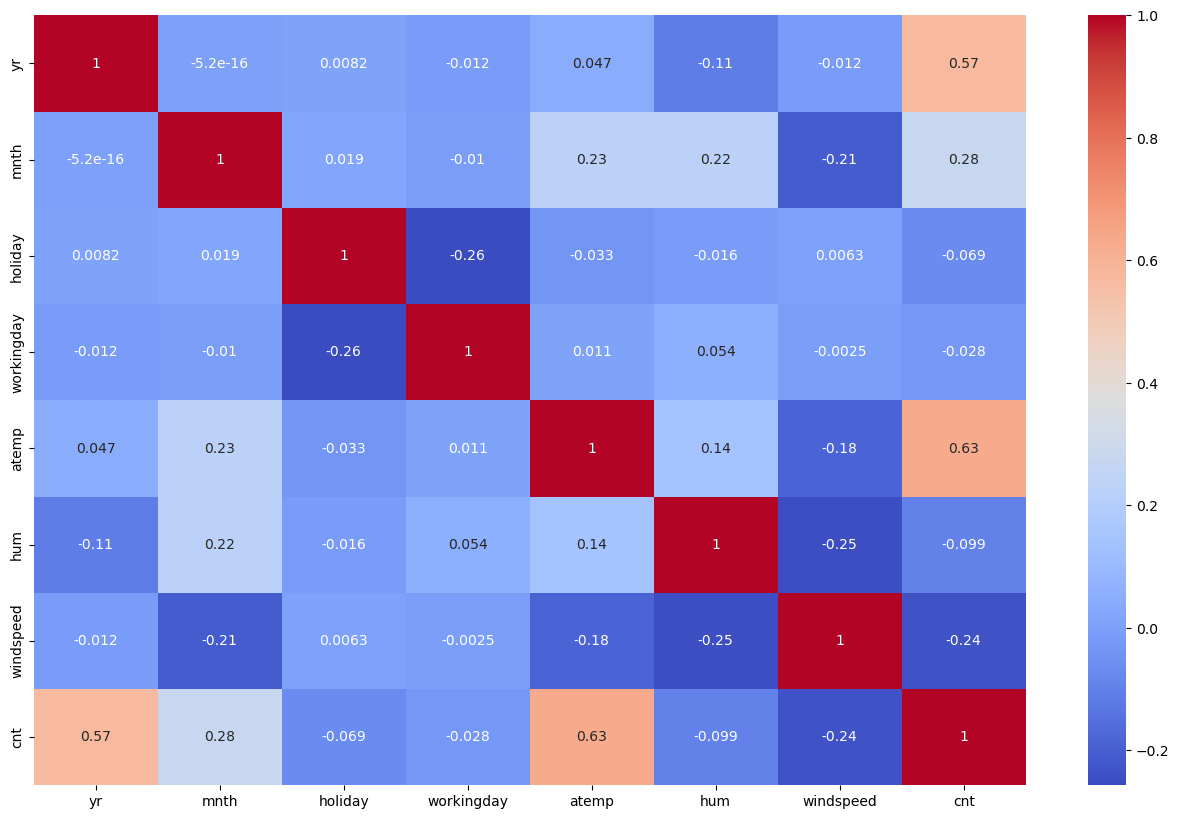

In [26]:
# Plotting heatmap again to see any other correlation between variables.

plt.figure(figsize=[16,10])
sns.heatmap(df[['yr','mnth','holiday','workingday','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap='coolwarm')
plt.show()

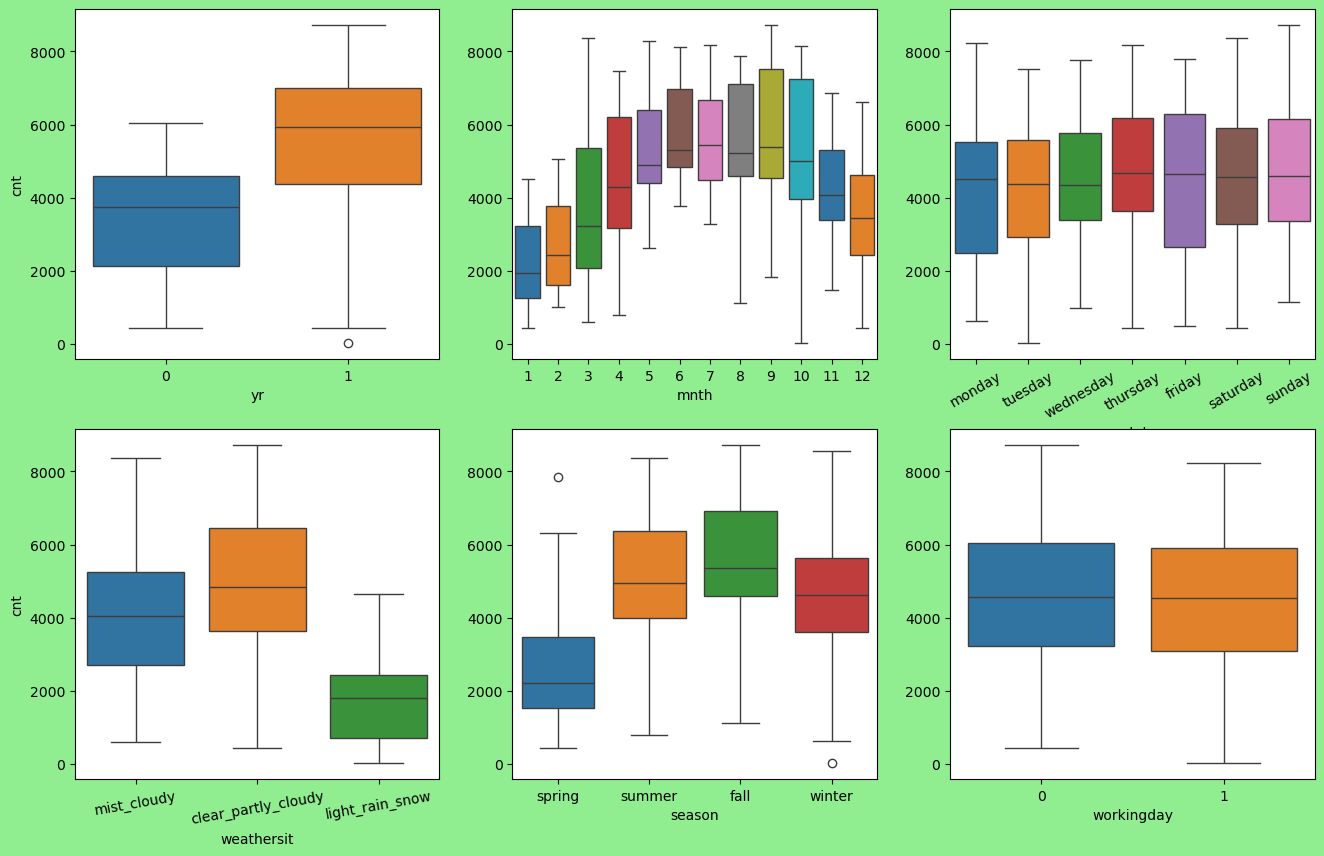

In [27]:
# Plotting boxplot for categorical columns to understand whats happening.

plt.figure(figsize=[16,10], facecolor='lightgreen')
 
plt.subplot(2,3,1)
sns.boxplot(data=df, x='yr', y='cnt', palette='tab10')

plt.subplot(2,3,2)
sns.boxplot(data=df, x='mnth', y='cnt', palette='tab10')
plt.ylabel('')

plt.subplot(2,3,3)
sns.boxplot(data=df, x='weekday', y='cnt', palette='tab10')
plt.xticks(rotation=30)
plt.ylabel('')

plt.subplot(2,3,4)
sns.boxplot(data=df, x='weathersit', y='cnt', palette='tab10')
plt.xticks(rotation=10)

plt.subplot(2,3,5)
sns.boxplot(data=df, x='season', y='cnt', palette='tab10')
plt.ylabel('')

plt.subplot(2,3,6)
sns.boxplot(data=df, x='workingday', y='cnt', palette='tab10')
plt.ylabel('')

plt.show()

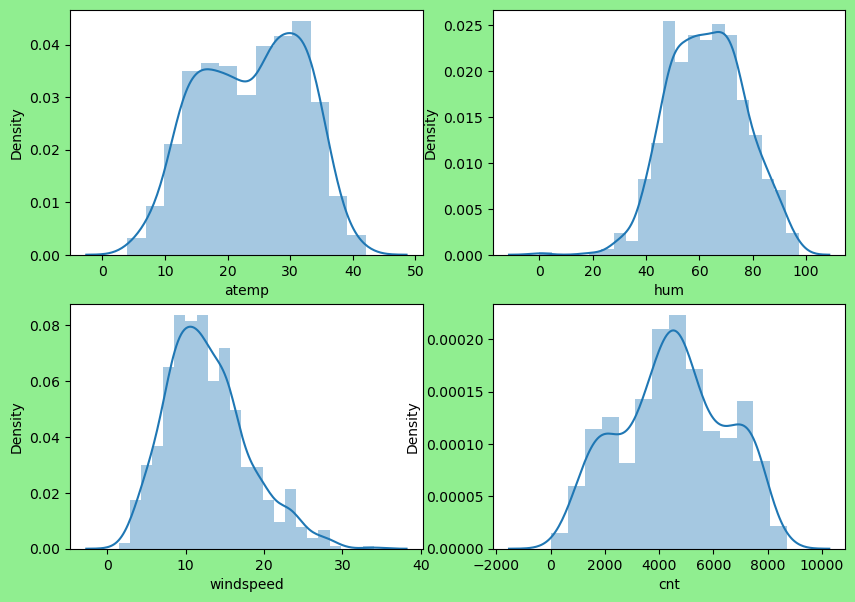

In [28]:
# Checking the distribution of variables

plt.figure(figsize=[10,7], facecolor='lightgreen')

plt.subplot(2,2,1)
sns.distplot(df['atemp'])

plt.subplot(2,2,2)
sns.distplot(df['hum'])

plt.subplot(2,2,3)
sns.distplot(df['windspeed'])

plt.subplot(2,2,4)
sns.distplot(df['cnt'])

plt.show()

#### Creating Dummy variables

In [29]:
# Creating and merging dummy variables for Categorical columns.

df = pd.get_dummies(df, columns=['season','weekday','mnth','weathersit'], dtype=int, drop_first=True)

In [30]:
# Checking the dataset with dummy variables created

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   atemp                       730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    int32  
 8   season_summer               730 non-null    int32  
 9   season_winter               730 non-null    int32  
 10  weekday_monday              730 non-null    int32  
 11  weekday_saturday            730 non-null    int32  
 12  weekday_sunday              730 non-null    int32  
 13  weekday_thursday            730 non

In [31]:
# checking the dataset

df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_light_rain_snow,weathersit_mist_cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train Test Split

In [32]:
# Split the dataset for training and testing.

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [33]:
# Checking the training dataset

df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_light_rain_snow,weathersit_mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.029412,0.345098
std,0.500429,0.157763,0.453386,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.169124,0.475867
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# checking the datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   atemp                       730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    int32  
 8   season_summer               730 non-null    int32  
 9   season_winter               730 non-null    int32  
 10  weekday_monday              730 non-null    int32  
 11  weekday_saturday            730 non-null    int32  
 12  weekday_sunday              730 non-null    int32  
 13  weekday_thursday            730 non

In [35]:
# Checking the holiday column in training dataset

df_train['holiday'].value_counts()

holiday
0    497
1     13
Name: count, dtype: int64

#### Scaling

In [36]:
# Creating the list of numerical variables

num_var = ['atemp','hum','windspeed','cnt']

In [37]:
# Fitting and transforming the numerical variables for creating the model

scaler = MinMaxScaler()

df_train[num_var] = scaler.fit_transform(df_train[num_var])

### Model Building

In [38]:
# Creating X and y for creating the model

y_train = df_train.pop('cnt')
X_train = df_train

#### Model with all variables

In [39]:
# Creating the model with all the variables first

# adding constant
X_train_sm = sm.add_constant(X_train)

# creating model and fit
lr = sm.OLS(y_train, X_train_sm).fit()

# summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.81
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          4.50e-177
Time:                        19:21:23   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     481   BIC:                            -857.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3397      0.084      4.038      0.000       0.174       0.505
yr                             0.2330      0.008     28.480      0.000       0.217       0.249
holiday                       -0.1337      0.066     -2.028      0.043      -0.263      -0.004
workingday                    -0.0657      0.072     -0.918      0.359      -0.207       0.075
atemp                          0.4104      0.046      8.958      0.000       0.320       0.500
hum                           -0.1519      0.039     -3.878      0.000      -0.229      -0.075
windspeed                     -0.1649      0.026     -6.279      0.000      -0.216      -0.113
season_spring                 -0.0474      0.030     -1.560      0.120      -0.107       0.012
season_summer                  0.0382      0.026      1.443      0.150      -0.014       0.090
season_winter                  0.1067      0.028      3.761      0.000       0.051       0.162
weekday_monday                -0.0258      0.015     -1.756      0.080      -0.055       0.003
weekday_saturday              -0.0580      0.072     -0.804      0.422      -0.200       0.084
weekday_sunday                -0.0552      0.072     -0.766      0.444      -0.197       0.086
weekday_thursday               0.0042      0.015      0.276      0.783      -0.025       0.034
weekday_tuesday               -0.0269      0.015     -1.814      0.070      -0.056       0.002
weekday_wednesday             -0.0111      0.015     -0.719      0.473      -0.041       0.019
mnth_2                         0.0294      0.021      1.404      0.161      -0.012       0.071
mnth_3                         0.0737      0.023      3.272      0.001       0.029       0.118
mnth_4                         0.0748      0.034      2.206      0.028       0.008       0.141
mnth_5                         0.1112      0.036      3.097      0.002       0.041       0.182
mnth_6                         0.1029      0.038      2.702      0.007       0.028       0.178
mnth_7                         0.0656      0.043      1.511      0.131      -0.020       0.151
mnth_8                         0.1235      0.041      3.006      0.003       0.043       0.204
mnth_9                         0.1752      0.037      4.693      0.000       0.102       0.249
mnth_10                        0.0804      0.035      2.305      0.022       0.012       0.149
mnth_11                        0.0292      0.033      0.873      0.383      -0.036       0.095
mnth_12                        0.0218      0.027      0.809      0.419      -0.031       0.075
weathersit_light_rain_snow    -0.2478      0.027     -9.211      0.000      -0.301      -0.195
weathersit_mist_cloudy        -0.0594      0.011     -5.608      0.000      -0.080      -0.039
===========================================

In [40]:
# Defining variance function to fetch the VIF frequently:

def variance(x):
    x = x
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [41]:
# Checking VIF of all the variables

variance(X_train)

,Feature,VIF
2,workingday,59.82
3,atemp,40.24
4,hum,39.75
6,season_spring,12.27
8,season_winter,12.08
11,weekday_sunday,11.53
10,weekday_saturday,11.07
7,season_summer,10.36
21,mnth_8,9.67
20,mnth_7,8.63


- As we can see that we have variables with high p-value and high VIF.
- Now our approach is to use RFE method for model building.

### RFE

In [42]:
# Feature selection using RFE method and first start with 15 varibles then we add one by one for improving the model.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [43]:
# Checking RFE selected columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weekday_monday', False, 10),
 ('weekday_saturday', False, 4),
 ('weekday_sunday', False, 5),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 9),
 ('weekday_wednesday', False, 13),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weathersit_light_rain_snow', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [44]:
# Storing RFE selected columns

col = X_train.columns[rfe.support_]

In [45]:
# Storing RFE declined columns

col_1 = X_train.columns[~rfe.support_]

In [46]:
# Taking training dataset with RFE selected variables 

X_train_rfe = X_train[col]

### Model. 1

In [47]:
# Creating 1st model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe)

# creating model and fit
lr_1 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.53e-185
Time:                        19:21:25   Log-Likelihood:                 506.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     494   BIC:                            -913.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3011      0.034      8.958      0.000       0.235       0.367
yr                             0.2322      0.008     28.276      0.000       0.216       0.248
holiday                       -0.0838      0.026     -3.239      0.001      -0.135      -0.033
atemp                          0.4563      0.033     13.659      0.000       0.391       0.522
hum                           -0.1602      0.038     -4.162      0.000      -0.236      -0.085
windspeed                     -0.1610      0.026     -6.153      0.000      -0.212      -0.110
season_spring                 -0.0771      0.019     -4.131      0.000      -0.114      -0.040
season_winter                  0.1004      0.016      6.168      0.000       0.068       0.132
mnth_3                         0.0584      0.015      3.843      0.000       0.029       0.088
mnth_4                         0.0584      0.020      2.914      0.004       0.019       0.098
mnth_5                         0.0920      0.019      4.890      0.000       0.055       0.129
mnth_6                         0.0629      0.019      3.276      0.001       0.025       0.101
mnth_8                         0.0611      0.018      3.376      0.001       0.026       0.097
mnth_9                         0.1178      0.017      6.732      0.000       0.083       0.152
weathersit_light_rain_snow    -0.2347      0.027     -8.784      0.000      -0.287      -0.182
weathersit_mist_cloudy        -0.0552      0.011     -5.208      0.000      -0.076      -0.034
==============================================================================
Omnibus:                       60.490   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.402
Skew:                          -0.591   Prob(JB):                     1.48e-35
Kurtosis:                       5.481   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Checking variance inflation factor of the model

variance(X_train_rfe)

,Feature,VIF
3,hum,25.74
2,atemp,15.52
4,windspeed,4.56
5,season_spring,3.52
6,season_winter,3.20
14,weathersit_mist_cloudy,2.26
0,yr,2.08
11,mnth_8,1.90
9,mnth_5,1.77
8,mnth_4,1.68


In [49]:
# Dropping 'hum' column as it has very high VIF

X_train_rfe_1 = X_train_rfe.drop('hum', axis=1)

### Model. 2

In [50]:
# Creating 2nd model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_1)### Model. 1

# creating model and fit
lr_2 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          5.37e-183
Time:                        19:21:25   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     495   BIC:                            -901.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2167      0.027      7.954      0.000       0.163       0.270
yr                             0.2357      0.008     28.387      0.000       0.219       0.252
holiday                       -0.0847      0.026     -3.220      0.001      -0.136      -0.033
atemp                          0.4262      0.033     12.857      0.000       0.361       0.491
windspeed                     -0.1328      0.026     -5.169      0.000      -0.183      -0.082
season_spring                 -0.0829      0.019     -4.384      0.000      -0.120      -0.046
season_winter                  0.0890      0.016      5.459      0.000       0.057       0.121
mnth_3                         0.0596      0.015      3.862      0.000       0.029       0.090
mnth_4                         0.0590      0.020      2.894      0.004       0.019       0.099
mnth_5                         0.0814      0.019      4.298      0.000       0.044       0.119
mnth_6                         0.0675      0.019      3.469      0.001       0.029       0.106
mnth_8                         0.0597      0.018      3.249      0.001       0.024       0.096
mnth_9                         0.1121      0.018      6.324      0.000       0.077       0.147
weathersit_light_rain_snow    -0.2788      0.025    -11.179      0.000      -0.328      -0.230
weathersit_mist_cloudy        -0.0804      0.009     -9.084      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       61.530   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.512
Skew:                          -0.619   Prob(JB):                     2.81e-34
Kurtosis:                       5.396   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Checking variance inflation factor of the model

variance(X_train_rfe_1)

,Feature,VIF
2,atemp,6.25
3,windspeed,4.56
4,season_spring,2.10
0,yr,2.08
5,season_winter,1.96
10,mnth_8,1.86
9,mnth_6,1.66
8,mnth_5,1.60
13,weathersit_mist_cloudy,1.55
7,mnth_4,1.54


In [52]:
# Dropping 'atemp' column as it has VIF greater than 5

X_train_rfe_2 = X_train_rfe_1.drop('atemp', axis=1)

### Model. 3

In [53]:
# Creating 3rd model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_2)

# creating model and fit
lr_3 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.83e-153
Time:                        19:21:25   Log-Likelihood:                 424.10
No. Observations:                 510   AIC:                            -820.2
Df Residuals:                     496   BIC:                            -760.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5077      0.018     29.007      0.000       0.473       0.542
yr                             0.2477      0.010     26.023      0.000       0.229       0.266
holiday                       -0.0879      0.030     -2.896      0.004      -0.148      -0.028
windspeed                     -0.1640      0.030     -5.560      0.000      -0.222      -0.106
season_spring                 -0.2393      0.017    -14.329      0.000      -0.272      -0.206
season_winter                 -0.0094      0.017     -0.565      0.572      -0.042       0.023
mnth_3                         0.0494      0.018      2.777      0.006       0.014       0.084
mnth_4                        -0.0152      0.023     -0.675      0.500      -0.060       0.029
mnth_5                         0.0670      0.022      3.073      0.002       0.024       0.110
mnth_6                         0.0932      0.022      4.172      0.000       0.049       0.137
mnth_8                         0.0930      0.021      4.429      0.000       0.052       0.134
mnth_9                         0.1320      0.020      6.477      0.000       0.092       0.172
weathersit_light_rain_snow    -0.2884      0.029    -10.029      0.000      -0.345      -0.232
weathersit_mist_cloudy        -0.0929      0.010     -9.158      0.000      -0.113      -0.073
==============================================================================
Omnibus:                       35.285   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.658
Skew:                          -0.373   Prob(JB):                     5.04e-18
Kurtosis:                       4.787   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking variance inflation factor of the model

variance(X_train_rfe_2)

,Feature,VIF
2,windspeed,3.96
3,season_spring,2.10
0,yr,1.90
4,season_winter,1.79
12,weathersit_mist_cloudy,1.55
6,mnth_4,1.48
7,mnth_5,1.32
5,mnth_3,1.31
9,mnth_8,1.31
8,mnth_6,1.25


In [55]:
# dropping 'winter' column as it has high p-value greater than 0.05

X_train_rfe_3 = X_train_rfe_2.drop('season_winter', axis=1)

### Model. 4

In [56]:
# Creating 4th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_3)

# creating model and fit
lr_4 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.68e-154
Time:                        19:21:25   Log-Likelihood:                 423.93
No. Observations:                 510   AIC:                            -821.9
Df Residuals:                     497   BIC:                            -766.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5013      0.013     37.379      0.000       0.475       0.528
yr                             0.2477      0.010     26.043      0.000       0.229       0.266
holiday                       -0.0885      0.030     -2.919      0.004      -0.148      -0.029
windspeed                     -0.1643      0.029     -5.572      0.000      -0.222      -0.106
season_spring                 -0.2334      0.013    -17.882      0.000      -0.259      -0.208
mnth_3                         0.0522      0.017      3.064      0.002       0.019       0.086
mnth_4                        -0.0086      0.019     -0.447      0.655      -0.046       0.029
mnth_5                         0.0737      0.018      4.001      0.000       0.037       0.110
mnth_6                         0.0997      0.019      5.207      0.000       0.062       0.137
mnth_8                         0.0996      0.017      5.690      0.000       0.065       0.134
mnth_9                         0.1366      0.019      7.308      0.000       0.100       0.173
weathersit_light_rain_snow    -0.2892      0.029    -10.074      0.000      -0.346      -0.233
weathersit_mist_cloudy        -0.0933      0.010     -9.231      0.000      -0.113      -0.073
==============================================================================
Omnibus:                       35.325   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.707
Skew:                          -0.374   Prob(JB):                     4.92e-18
Kurtosis:                       4.787   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking variance inflation factor of the model

variance(X_train_rfe_3)

,Feature,VIF
2,windspeed,3.06
0,yr,1.80
3,season_spring,1.73
11,weathersit_mist_cloudy,1.46
5,mnth_4,1.29
4,mnth_3,1.27
6,mnth_5,1.19
8,mnth_8,1.19
7,mnth_6,1.16
9,mnth_9,1.15


In [58]:
# dropping '4' column as it has high p-value greater than 0.05

X_train_rfe_4 = X_train_rfe_3.drop('mnth_4', axis=1)

### Model. 5

In [59]:
# creating 5th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_5 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.29e-155
Time:                        19:21:25   Log-Likelihood:                 423.83
No. Observations:                 510   AIC:                            -823.7
Df Residuals:                     498   BIC:                            -772.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5006      0.013     37.634      0.000       0.474       0.527
yr                             0.2475      0.009     26.076      0.000       0.229       0.266
holiday                       -0.0882      0.030     -2.913      0.004      -0.148      -0.029
windspeed                     -0.1670      0.029     -5.798      0.000      -0.224      -0.110
season_spring                 -0.2318      0.013    -18.501      0.000      -0.256      -0.207
mnth_3                         0.0531      0.017      3.136      0.002       0.020       0.086
mnth_5                         0.0753      0.018      4.180      0.000       0.040       0.111
mnth_6                         0.1014      0.019      5.404      0.000       0.065       0.138
mnth_8                         0.1012      0.017      5.908      0.000       0.068       0.135
mnth_9                         0.1380      0.018      7.512      0.000       0.102       0.174
weathersit_light_rain_snow    -0.2884      0.029    -10.075      0.000      -0.345      -0.232
weathersit_mist_cloudy        -0.0933      0.010     -9.238      0.000      -0.113      -0.073
==============================================================================
Omnibus:                       34.339   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.711
Skew:                          -0.365   Prob(JB):                     2.20e-17
Kurtosis:                       4.754   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Checking variance inflation factor of the model

variance(X_train_rfe_4)

,Feature,VIF
2,windspeed,2.64
0,yr,1.78
3,season_spring,1.62
10,weathersit_mist_cloudy,1.46
4,mnth_3,1.26
5,mnth_5,1.15
7,mnth_8,1.15
6,mnth_6,1.12
8,mnth_9,1.12
9,weathersit_light_rain_snow,1.07


In [61]:
# Displaying the RFE declined columns

col_1

Index(['workingday', 'season_summer', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'mnth_2', 'mnth_7', 'mnth_10', 'mnth_11',
       'mnth_12'],
      dtype='object')

In [62]:
# Adding 'summer' column to check if model improves

X_train_rfe_4['season_summer'] = X_train['season_summer']

### Model. 6

In [63]:
# Creating 6th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_6 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          7.80e-156
Time:                        19:21:25   Log-Likelihood:                 427.58
No. Observations:                 510   AIC:                            -829.2
Df Residuals:                     497   BIC:                            -774.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5056      0.013     37.888      0.000       0.479       0.532
yr                             0.2483      0.009     26.316      0.000       0.230       0.267
holiday                       -0.0885      0.030     -2.941      0.003      -0.148      -0.029
windspeed                     -0.1521      0.029     -5.219      0.000      -0.209      -0.095
season_spring                 -0.2466      0.014    -18.136      0.000      -0.273      -0.220
mnth_3                         0.0664      0.018      3.790      0.000       0.032       0.101
mnth_5                         0.1076      0.021      5.006      0.000       0.065       0.150
mnth_6                         0.1187      0.020      6.023      0.000       0.080       0.157
mnth_8                         0.0912      0.017      5.240      0.000       0.057       0.125
mnth_9                         0.1285      0.019      6.908      0.000       0.092       0.165
weathersit_light_rain_snow    -0.2925      0.028    -10.268      0.000      -0.348      -0.237
weathersit_mist_cloudy        -0.0918      0.010     -9.128      0.000      -0.112      -0.072
season_summer                 -0.0429      0.016     -2.715      0.007      -0.074      -0.012
==============================================================================
Omnibus:                       38.973   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.544
Skew:                          -0.403   Prob(JB):                     1.32e-20
Kurtosis:                       4.913   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Checking variance inflation factor of the model

variance(X_train_rfe_4)

,Feature,VIF
2,windspeed,3.03
11,season_summer,2.75
3,season_spring,1.89
0,yr,1.79
5,mnth_5,1.74
10,weathersit_mist_cloudy,1.47
4,mnth_3,1.37
6,mnth_6,1.29
7,mnth_8,1.19
8,mnth_9,1.15


- We found that our model improves (r-squared value increased) after adding 'summer' column.
- So we kept this 'summer' column.

In [65]:
# adding 'monday' column

X_train_rfe_4['weekday_monday'] = X_train['weekday_monday']

### Model. 7

In [66]:
# Creating 7th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_7 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.32e-155
Time:                        19:21:25   Log-Likelihood:                 429.65
No. Observations:                 510   AIC:                            -831.3
Df Residuals:                     496   BIC:                            -772.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5100      0.013     37.824      0.000       0.483       0.536
yr                             0.2476      0.009     26.305      0.000       0.229       0.266
holiday                       -0.0931      0.030     -3.094      0.002      -0.152      -0.034
windspeed                     -0.1503      0.029     -5.169      0.000      -0.207      -0.093
season_spring                 -0.2463      0.014    -18.166      0.000      -0.273      -0.220
mnth_3                         0.0646      0.017      3.696      0.000       0.030       0.099
mnth_5                         0.1054      0.021      4.911      0.000       0.063       0.148
mnth_6                         0.1187      0.020      6.043      0.000       0.080       0.157
mnth_8                         0.0912      0.017      5.258      0.000       0.057       0.125
mnth_9                         0.1276      0.019      6.882      0.000       0.091       0.164
weathersit_light_rain_snow    -0.2919      0.028    -10.279      0.000      -0.348      -0.236
weathersit_mist_cloudy        -0.0925      0.010     -9.216      0.000      -0.112      -0.073
season_summer                 -0.0425      0.016     -2.702      0.007      -0.073      -0.012
weekday_monday                -0.0262      0.013     -2.008      0.045      -0.052      -0.001
==============================================================================
Omnibus:                       38.729   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.954
Skew:                          -0.385   Prob(JB):                     2.40e-21
Kurtosis:                       4.969   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Checking variance inflation factor of the model

variance(X_train_rfe_4)

,Feature,VIF
2,windspeed,3.12
11,season_summer,2.75
3,season_spring,1.90
0,yr,1.79
5,mnth_5,1.74
10,weathersit_mist_cloudy,1.47
4,mnth_3,1.37
6,mnth_6,1.29
7,mnth_8,1.19
12,weekday_monday,1.17


- We found that our model improves (r-squared value increased) after adding 'summer' column.
- So we kept this 'summer' column.

In [68]:
# adding 'saturday' column 

X_train_rfe_4['weekday_saturday'] = X_train['weekday_saturday']

### Model. 8

In [69]:
# Creating 8th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_8 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.01e-154
Time:                        19:21:25   Log-Likelihood:                 430.12
No. Observations:                 510   AIC:                            -830.2
Df Residuals:                     495   BIC:                            -766.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5079      0.014     37.195      0.000       0.481       0.535
yr                             0.2478      0.009     26.318      0.000       0.229       0.266
holiday                       -0.0921      0.030     -3.059      0.002      -0.151      -0.033
windspeed                     -0.1499      0.029     -5.157      0.000      -0.207      -0.093
season_spring                 -0.2465      0.014    -18.177      0.000      -0.273      -0.220
mnth_3                         0.0646      0.017      3.694      0.000       0.030       0.099
mnth_5                         0.1054      0.021      4.911      0.000       0.063       0.148
mnth_6                         0.1189      0.020      6.053      0.000       0.080       0.157
mnth_8                         0.0906      0.017      5.218      0.000       0.056       0.125
mnth_9                         0.1274      0.019      6.866      0.000       0.091       0.164
weathersit_light_rain_snow    -0.2931      0.028    -10.310      0.000      -0.349      -0.237
weathersit_mist_cloudy        -0.0927      0.010     -9.234      0.000      -0.112      -0.073
season_summer                 -0.0427      0.016     -2.710      0.007      -0.074      -0.012
weekday_monday                -0.0241      0.013     -1.820      0.069      -0.050       0.002
weekday_saturday               0.0136      0.014      0.958      0.338      -0.014       0.041
==============================================================================
Omnibus:                       38.432   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.460
Skew:                          -0.384   Prob(JB):                     5.08e-21
Kurtosis:                       4.951   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Checking variance inflation factor of the model

variance(X_train_rfe_4)

,Feature,VIF
2,windspeed,3.16
11,season_summer,2.75
3,season_spring,1.91
0,yr,1.80
5,mnth_5,1.74
10,weathersit_mist_cloudy,1.48
4,mnth_3,1.37
6,mnth_6,1.29
7,mnth_8,1.20
12,weekday_monday,1.19


In [71]:
# dropping 'saturday' column as it Deteriorate the model

X_train_rfe_4.drop('weekday_saturday', axis=1, inplace=True)

In [72]:
# adding 'sunday' column

X_train_rfe_4['weekday_sunday'] = X_train['weekday_sunday']

### Model. 9

In [73]:
# Creating 9th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_9 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          7.25e-155
Time:                        19:21:26   Log-Likelihood:                 430.46
No. Observations:                 510   AIC:                            -830.9
Df Residuals:                     495   BIC:                            -767.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5076      0.014     37.319      0.000       0.481       0.534
yr                             0.2475      0.009     26.309      0.000       0.229       0.266
holiday                       -0.0915      0.030     -3.041      0.002      -0.151      -0.032
windspeed                     -0.1513      0.029     -5.207      0.000      -0.208      -0.094
season_spring                 -0.2462      0.014    -18.173      0.000      -0.273      -0.220
mnth_3                         0.0644      0.017      3.684      0.000       0.030       0.099
mnth_5                         0.1059      0.021      4.935      0.000       0.064       0.148
mnth_6                         0.1186      0.020      6.043      0.000       0.080       0.157
mnth_8                         0.0912      0.017      5.262      0.000       0.057       0.125
mnth_9                         0.1276      0.019      6.883      0.000       0.091       0.164
weathersit_light_rain_snow    -0.2908      0.028    -10.243      0.000      -0.347      -0.235
weathersit_mist_cloudy        -0.0932      0.010     -9.282      0.000      -0.113      -0.073
season_summer                 -0.0422      0.016     -2.684      0.008      -0.073      -0.011
weekday_monday                -0.0233      0.013     -1.763      0.078      -0.049       0.003
weekday_sunday                 0.0174      0.014      1.256      0.210      -0.010       0.045
==============================================================================
Omnibus:                       40.184   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.623
Skew:                          -0.416   Prob(JB):                     2.84e-21
Kurtosis:                       4.939   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# dropping 'sunday' column as it Deteriorate the model

X_train_rfe_4.drop('weekday_sunday', axis=1, inplace=True)

In [75]:
# adding 'thursday' column

X_train_rfe_4['weekday_thursday'] = X_train['weekday_thursday']

### Model. 10

In [76]:
# Creating 10th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating  model and fit
lr_10 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          8.27e-155
Time:                        19:21:26   Log-Likelihood:                 430.32
No. Observations:                 510   AIC:                            -830.6
Df Residuals:                     495   BIC:                            -767.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5069      0.014     36.892      0.000       0.480       0.534
yr                             0.2474      0.009     26.288      0.000       0.229       0.266
holiday                       -0.0903      0.030     -2.994      0.003      -0.150      -0.031
windspeed                     -0.1499      0.029     -5.159      0.000      -0.207      -0.093
season_spring                 -0.2459      0.014    -18.140      0.000      -0.273      -0.219
mnth_3                         0.0644      0.017      3.683      0.000       0.030       0.099
mnth_5                         0.1051      0.021      4.899      0.000       0.063       0.147
mnth_6                         0.1195      0.020      6.082      0.000       0.081       0.158
mnth_8                         0.0909      0.017      5.242      0.000       0.057       0.125
mnth_9                         0.1274      0.019      6.870      0.000       0.091       0.164
weathersit_light_rain_snow    -0.2894      0.028    -10.161      0.000      -0.345      -0.233
weathersit_mist_cloudy        -0.0914      0.010     -9.082      0.000      -0.111      -0.072
season_summer                 -0.0432      0.016     -2.745      0.006      -0.074      -0.012
weekday_monday                -0.0235      0.013     -1.772      0.077      -0.049       0.003
weekday_thursday               0.0157      0.014      1.145      0.253      -0.011       0.043
==============================================================================
Omnibus:                       37.762   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.507
Skew:                          -0.370   Prob(JB):                     4.96e-21
Kurtosis:                       4.963   Cond. No.                         8.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# dropping 'thursday' column as it Deteriorate the model

X_train_rfe_4.drop('weekday_thursday', axis=1, inplace=True)

In [78]:
# adding 'tuesday' column

X_train_rfe_4['weekday_tuesday'] = X_train['weekday_tuesday']

### Model. 11

In [79]:
# Creating 11th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_11 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.18e-155
Time:                        19:21:26   Log-Likelihood:                 431.71
No. Observations:                 510   AIC:                            -833.4
Df Residuals:                     495   BIC:                            -769.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5149      0.014     37.676      0.000       0.488       0.542
yr                             0.2480      0.009     26.420      0.000       0.230       0.266
holiday                       -0.0922      0.030     -3.074      0.002      -0.151      -0.033
windspeed                     -0.1476      0.029     -5.088      0.000      -0.205      -0.091
season_spring                 -0.2475      0.014    -18.292      0.000      -0.274      -0.221
mnth_3                         0.0640      0.017      3.671      0.000       0.030       0.098
mnth_5                         0.1045      0.021      4.884      0.000       0.062       0.147
mnth_6                         0.1182      0.020      6.038      0.000       0.080       0.157
mnth_8                         0.0884      0.017      5.097      0.000       0.054       0.123
mnth_9                         0.1265      0.018      6.841      0.000       0.090       0.163
weathersit_light_rain_snow    -0.2948      0.028    -10.399      0.000      -0.351      -0.239
weathersit_mist_cloudy        -0.0928      0.010     -9.276      0.000      -0.112      -0.073
season_summer                 -0.0433      0.016     -2.757      0.006      -0.074      -0.012
weekday_monday                -0.0310      0.013     -2.347      0.019      -0.057      -0.005
weekday_tuesday               -0.0266      0.013     -2.004      0.046      -0.053      -0.001
==============================================================================
Omnibus:                       38.536   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.776
Skew:                          -0.381   Prob(JB):                     2.63e-21
Kurtosis:                       4.969   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
col_1

Index(['workingday', 'season_summer', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'mnth_2', 'mnth_7', 'mnth_10', 'mnth_11',
       'mnth_12'],
      dtype='object')

In [81]:
# dropping 'tuesday' column as it Deteriorate the model

X_train_rfe_4.drop('weekday_tuesday', axis=1, inplace=True)

In [82]:
# adding 'wednesday' column

X_train_rfe_4['weekday_wednesday'] = X_train['weekday_wednesday']

### Model. 12

In [83]:
# Creating 12th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_12 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          9.94e-155
Time:                        19:21:26   Log-Likelihood:                 430.13
No. Observations:                 510   AIC:                            -830.3
Df Residuals:                     495   BIC:                            -766.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5124      0.014     37.365      0.000       0.485       0.539
yr                             0.2477      0.009     26.312      0.000       0.229       0.266
holiday                       -0.0876      0.031     -2.864      0.004      -0.148      -0.028
windspeed                     -0.1519      0.029     -5.216      0.000      -0.209      -0.095
season_spring                 -0.2461      0.014    -18.148      0.000      -0.273      -0.219
mnth_3                         0.0642      0.017      3.666      0.000       0.030       0.099
mnth_5                         0.1055      0.021      4.917      0.000       0.063       0.148
mnth_6                         0.1183      0.020      6.021      0.000       0.080       0.157
mnth_8                         0.0914      0.017      5.268      0.000       0.057       0.126
mnth_9                         0.1271      0.019      6.852      0.000       0.091       0.164
weathersit_light_rain_snow    -0.2914      0.028    -10.259      0.000      -0.347      -0.236
weathersit_mist_cloudy        -0.0923      0.010     -9.202      0.000      -0.112      -0.073
season_summer                 -0.0423      0.016     -2.686      0.007      -0.073      -0.011
weekday_monday                -0.0282      0.013     -2.136      0.033      -0.054      -0.002
weekday_wednesday             -0.0137      0.014     -0.971      0.332      -0.042       0.014
==============================================================================
Omnibus:                       38.771   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.455
Skew:                          -0.395   Prob(JB):                     8.39e-21
Kurtosis:                       4.930   Cond. No.                         9.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# dropping 'wednesday' column as it Deteriorate the model

X_train_rfe_4.drop('weekday_wednesday', axis=1, inplace=True)

In [85]:
# adding '2' column

X_train_rfe_4['mnth_2'] = X_train['mnth_2']

### Model. 13

In [86]:
# creating 13th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_13 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          9.81e-155
Time:                        19:21:26   Log-Likelihood:                 430.15
No. Observations:                 510   AIC:                            -830.3
Df Residuals:                     495   BIC:                            -766.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5103      0.013     37.835      0.000       0.484       0.537
yr                             0.2477      0.009     26.309      0.000       0.229       0.266
holiday                       -0.0934      0.030     -3.103      0.002      -0.152      -0.034
windspeed                     -0.1521      0.029     -5.222      0.000      -0.209      -0.095
season_spring                 -0.2535      0.015    -16.450      0.000      -0.284      -0.223
mnth_3                         0.0700      0.018      3.822      0.000       0.034       0.106
mnth_5                         0.1066      0.021      4.961      0.000       0.064       0.149
mnth_6                         0.1195      0.020      6.079      0.000       0.081       0.158
mnth_8                         0.0912      0.017      5.255      0.000       0.057       0.125
mnth_9                         0.1276      0.019      6.881      0.000       0.091       0.164
weathersit_light_rain_snow    -0.2927      0.028    -10.302      0.000      -0.349      -0.237
weathersit_mist_cloudy        -0.0922      0.010     -9.192      0.000      -0.112      -0.073
season_summer                 -0.0438      0.016     -2.770      0.006      -0.075      -0.013
weekday_monday                -0.0255      0.013     -1.952      0.052      -0.051       0.000
mnth_2                         0.0220      0.022      0.984      0.325      -0.022       0.066
==============================================================================
Omnibus:                       38.827   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.122
Skew:                          -0.379   Prob(JB):                     8.13e-22
Kurtosis:                       4.999   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# dropping '2' column as it Deteriorate the model

X_train_rfe_4.drop('mnth_2', axis=1, inplace=True)

In [88]:
# adding '7' column

X_train_rfe_4['mnth_7'] = X_train['mnth_7']

### Model. 14

In [89]:
# Creating 14th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_14 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.2
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.80e-158
Time:                        19:21:26   Log-Likelihood:                 438.61
No. Observations:                 510   AIC:                            -847.2
Df Residuals:                     495   BIC:                            -783.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4874      0.014     34.062      0.000       0.459       0.515
yr                             0.2467      0.009     26.640      0.000       0.229       0.265
holiday                       -0.0843      0.030     -2.840      0.005      -0.143      -0.026
windspeed                     -0.1447      0.029     -5.055      0.000      -0.201      -0.088
season_spring                 -0.2278      0.014    -16.225      0.000      -0.255      -0.200
mnth_3                         0.0662      0.017      3.846      0.000       0.032       0.100
mnth_5                         0.1089      0.021      5.156      0.000       0.067       0.150
mnth_6                         0.1292      0.019      6.631      0.000       0.091       0.167
mnth_8                         0.1113      0.018      6.280      0.000       0.076       0.146
mnth_9                         0.1466      0.019      7.802      0.000       0.110       0.184
weathersit_light_rain_snow    -0.2839      0.028    -10.139      0.000      -0.339      -0.229
weathersit_mist_cloudy        -0.0878      0.010     -8.846      0.000      -0.107      -0.068
season_summer                 -0.0268      0.016     -1.685      0.093      -0.058       0.004
weekday_monday                -0.0266      0.013     -2.078      0.038      -0.052      -0.001
mnth_7                         0.0812      0.019      4.208      0.000       0.043       0.119
==============================================================================
Omnibus:                       37.244   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.642
Skew:                          -0.342   Prob(JB):                     6.27e-22
Kurtosis:                       5.032   Cond. No.                         9.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# dropping 'summer' and 'monday' column as it Deteriorate the model

X_train_rfe_4.drop(['season_summer','weekday_monday'], axis=1, inplace=True)

### Model. 15

In [91]:
# Creating 15th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating a model and fit
lr_15 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          6.44e-159
Time:                        19:21:26   Log-Likelihood:                 434.91
No. Observations:                 510   AIC:                            -843.8
Df Residuals:                     497   BIC:                            -788.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4778      0.014     34.375      0.000       0.451       0.505
yr                             0.2468      0.009     26.550      0.000       0.229       0.265
holiday                       -0.0786      0.030     -2.644      0.008      -0.137      -0.020
windspeed                     -0.1550      0.028     -5.472      0.000      -0.211      -0.099
season_spring                 -0.2175      0.013    -17.212      0.000      -0.242      -0.193
mnth_3                         0.0601      0.017      3.611      0.000       0.027       0.093
mnth_5                         0.0921      0.018      5.115      0.000       0.057       0.127
mnth_6                         0.1197      0.019      6.371      0.000       0.083       0.157
mnth_8                         0.1190      0.017      6.922      0.000       0.085       0.153
mnth_9                         0.1549      0.018      8.441      0.000       0.119       0.191
weathersit_light_rain_snow    -0.2813      0.028    -10.017      0.000      -0.336      -0.226
weathersit_mist_cloudy        -0.0877      0.010     -8.791      0.000      -0.107      -0.068
mnth_7                         0.0885      0.019      4.697      0.000       0.052       0.126
==============================================================================
Omnibus:                       35.283   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.098
Skew:                          -0.336   Prob(JB):                     7.41e-20
Kurtosis:                       4.922   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Checking variance inflation factor of the model

variance(X_train_rfe_4)

,Feature,VIF
2,windspeed,2.75
0,yr,1.82
3,season_spring,1.65
10,weathersit_mist_cloudy,1.46
4,mnth_3,1.26
7,mnth_8,1.17
5,mnth_5,1.16
6,mnth_6,1.14
8,mnth_9,1.13
11,mnth_7,1.12


In [93]:
col_1

Index(['workingday', 'season_summer', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'mnth_2', 'mnth_7', 'mnth_10', 'mnth_11',
       'mnth_12'],
      dtype='object')

In [94]:
# adding '10' column

X_train_rfe_4['mnth_10'] = X_train['mnth_10']

### Model. 16

In [95]:
# Creating 16th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating a model and fit
lr_16 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          5.42e-165
Time:                        19:21:26   Log-Likelihood:                 452.00
No. Observations:                 510   AIC:                            -876.0
Df Residuals:                     496   BIC:                            -816.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4487      0.014     31.284      0.000       0.421       0.477
yr                             0.2477      0.009     27.519      0.000       0.230       0.265
holiday                       -0.0738      0.029     -2.562      0.011      -0.130      -0.017
windspeed                     -0.1466      0.027     -5.337      0.000      -0.201      -0.093
season_spring                 -0.1945      0.013    -15.137      0.000      -0.220      -0.169
mnth_3                         0.0719      0.016      4.429      0.000       0.040       0.104
mnth_5                         0.1188      0.018      6.595      0.000       0.083       0.154
mnth_6                         0.1461      0.019      7.796      0.000       0.109       0.183
mnth_8                         0.1459      0.017      8.448      0.000       0.112       0.180
mnth_9                         0.1827      0.018      9.936      0.000       0.147       0.219
weathersit_light_rain_snow    -0.3013      0.027    -11.000      0.000      -0.355      -0.248
weathersit_mist_cloudy        -0.0888      0.010     -9.199      0.000      -0.108      -0.070
mnth_7                         0.1156      0.019      6.143      0.000       0.079       0.153
mnth_10                        0.1059      0.018      5.864      0.000       0.070       0.141
==============================================================================
Omnibus:                       68.047   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.217
Skew:                          -0.616   Prob(JB):                     3.71e-46
Kurtosis:                       5.886   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Checking variance inflation factor of the model

variance(X_train_rfe_4)

,Feature,VIF
2,windspeed,2.91
0,yr,1.84
3,season_spring,1.73
10,weathersit_mist_cloudy,1.48
4,mnth_3,1.27
12,mnth_10,1.21
5,mnth_5,1.19
7,mnth_8,1.19
6,mnth_6,1.16
8,mnth_9,1.15


In [97]:
# adding '11' column

X_train_rfe_4['mnth_11'] = X_train['mnth_11']

### Model. 17

In [98]:
# Creating 17th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating model and fit
lr_17 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          5.54e-164
Time:                        19:21:26   Log-Likelihood:                 452.23
No. Observations:                 510   AIC:                            -874.5
Df Residuals:                     495   BIC:                            -810.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4440      0.016     27.738      0.000       0.413       0.475
yr                             0.2478      0.009     27.512      0.000       0.230       0.266
holiday                       -0.0758      0.029     -2.617      0.009      -0.133      -0.019
windspeed                     -0.1460      0.027     -5.311      0.000      -0.200      -0.092
season_spring                 -0.1905      0.014    -13.423      0.000      -0.218      -0.163
mnth_3                         0.0737      0.016      4.474      0.000       0.041       0.106
mnth_5                         0.1232      0.019      6.414      0.000       0.085       0.161
mnth_6                         0.1505      0.020      7.562      0.000       0.111       0.190
mnth_8                         0.1502      0.019      8.116      0.000       0.114       0.187
mnth_9                         0.1873      0.020      9.536      0.000       0.149       0.226
weathersit_light_rain_snow    -0.3018      0.027    -11.006      0.000      -0.356      -0.248
weathersit_mist_cloudy        -0.0887      0.010     -9.175      0.000      -0.108      -0.070
mnth_7                         0.1201      0.020      6.003      0.000       0.081       0.159
mnth_10                        0.1104      0.019      5.719      0.000       0.072       0.148
mnth_11                        0.0126      0.019      0.660      0.510      -0.025       0.050
==============================================================================
Omnibus:                       68.937   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.943
Skew:                          -0.620   Prob(JB):                     2.12e-47
Kurtosis:                       5.929   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# dropping '11' column as it Deteriorate the model

X_train_rfe_4.drop('mnth_11', axis=1, inplace=True)

In [100]:
# adding '12' column

X_train_rfe_4['mnth_12'] = X_train['mnth_12']

### Model. 18

In [101]:
# Creating 18th model

# adding constant
X_train_sm = sm.add_constant(X_train_rfe_4)

# creating a model and fit
lr_18 = sm.OLS(y_train, X_train_sm).fit()

# summary
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          5.75e-164
Time:                        19:21:27   Log-Likelihood:                 452.19
No. Observations:                 510   AIC:                            -874.4
Df Residuals:                     495   BIC:                            -810.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4522      0.015     29.193      0.000       0.422       0.483
yr                             0.2475      0.009     27.458      0.000       0.230       0.265
holiday                       -0.0747      0.029     -2.588      0.010      -0.131      -0.018
windspeed                     -0.1485      0.028     -5.367      0.000      -0.203      -0.094
season_spring                 -0.1955      0.013    -15.079      0.000      -0.221      -0.170
mnth_3                         0.0699      0.017      4.218      0.000       0.037       0.103
mnth_5                         0.1160      0.019      6.228      0.000       0.079       0.153
mnth_6                         0.1433      0.019      7.417      0.000       0.105       0.181
mnth_8                         0.1430      0.018      7.979      0.000       0.108       0.178
mnth_9                         0.1799      0.019      9.463      0.000       0.143       0.217
weathersit_light_rain_snow    -0.3014      0.027    -10.994      0.000      -0.355      -0.248
weathersit_mist_cloudy        -0.0888      0.010     -9.192      0.000      -0.108      -0.070
mnth_7                         0.1127      0.019      5.805      0.000       0.075       0.151
mnth_10                        0.1032      0.019      5.530      0.000       0.067       0.140
mnth_12                       -0.0107      0.018     -0.603      0.547      -0.045       0.024
==============================================================================
Omnibus:                       68.274   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.087
Skew:                          -0.618   Prob(JB):                     2.40e-46
Kurtosis:                       5.891   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# dropping '12' column as it Deteriorate the model

X_train_rfe_4.drop('mnth_12', axis=1, inplace=True)

In [103]:
X_train_rfe_4.columns

Index(['yr', 'holiday', 'windspeed', 'season_spring', 'mnth_3', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'weathersit_light_rain_snow',
       'weathersit_mist_cloudy', 'mnth_7', 'mnth_10'],
      dtype='object')

## We have created models with all the columns, Now checking which model can we choose:

## We choose lr_16 as our final model

In [104]:
print(lr_16.summary())
print(variance(X_train_rfe_4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          5.42e-165
Time:                        19:21:27   Log-Likelihood:                 452.00
No. Observations:                 510   AIC:                            -876.0
Df Residuals:                     496   BIC:                            -816.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [105]:
# Predicting values

X_train_sm = sm.add_constant(X_train_rfe_4)

y_train_pred = lr_16.predict(X_train_sm)

#### Residual Analysis

In [106]:
# Finding residuals

res = y_train - y_train_pred

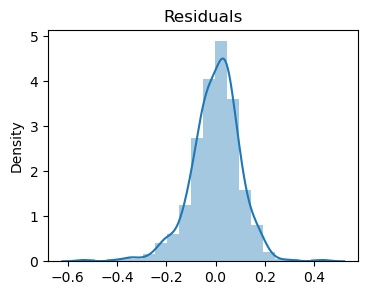

In [107]:
# Plotting distplot to see the residual distribution

plt.figure(figsize=[4,3])
sns.distplot(res, bins=20)
plt.title('Residuals')
plt.show()

In [108]:
# Crosschecking by finding r-squared value

r2_score(y_true= y_train, y_pred= y_train_pred)

0.8021021147601972

In [109]:
# checking dataset

df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_light_rain_snow,weathersit_mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.027273,0.318182
std,0.500809,0.187620,0.480828,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.163248,0.466833
min,0.000000,0.000000,0.000000,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Evaluation
- Now validating our model on test dataset

In [110]:
# Transforming the numerical variables in test dataset

df_test[num_var] = scaler.transform(df_test[num_var])

In [111]:
# Creating X and y for testing the model

y_test = df_test.pop('cnt')
X_test = df_test

In [112]:
# Checking shape of the datset

X_train_rfe_4.shape

(510, 13)

In [113]:
# Fetching only selected column on which our model is created

X_test = X_test[X_train_rfe_4.columns]

In [114]:
# checking dataset

X_test.head()

,yr,holiday,windspeed,season_spring,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_light_rain_snow,weathersit_mist_cloudy,mnth_7,mnth_10
184,0,1,0.084219,0,0,0,0,0,0,0,1,1,0
535,1,0,0.153728,0,0,0,1,0,0,0,0,0,0
299,0,0,0.334206,0,0,0,0,0,0,0,1,0,1
221,0,0,0.339570,0,0,0,0,1,0,0,0,0,0
152,0,0,0.537414,0,0,0,1,0,0,0,0,0,0


In [115]:
# adding constant

X_test_sm = sm.add_constant(X_test)

In [116]:
# Predict values for test dataset

y_test_pred = lr_16.predict(X_test_sm)

#### Residual Analysis

In [117]:
# Finding residuals for test dataset

res = y_test - y_test_pred

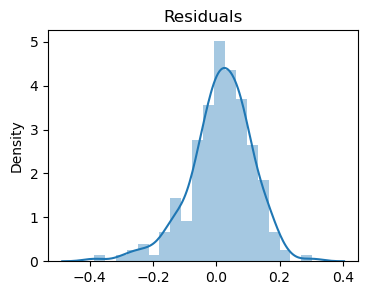

In [118]:
# Plotting distplot to see the value distribution of residuals

plt.figure(figsize=[4,3])
sns.distplot(res, bins=20)
plt.title('Residuals')
plt.show()

### R-squared Value

In [119]:
# Finding r-squared value of both training and testing dataset.

print('R-squared value of Train :', r2_score(y_true= y_train, y_pred= y_train_pred)) # R-square for train data
print('R-squared value of Test  :', r2_score(y_true= y_test, y_pred= y_test_pred))   # R-square for test data

R-squared value of Train : 0.8021021147601972
R-squared value of Test  : 0.7940622102942664


### Root Mean Squared Error

In [120]:
# Finding square root of Mean squared error for both train and test dataset

print('RMSE of Train :', np.sqrt(mean_squared_error(y_true=y_train, y_pred= y_train_pred))) # MSE for train
print('RMSE of Test  :', np.sqrt(mean_squared_error(y_true=y_test, y_pred= y_test_pred)))   # MSE for test

RMSE of Train : 0.09973729688851121
RMSE of Test  : 0.09923087744315989


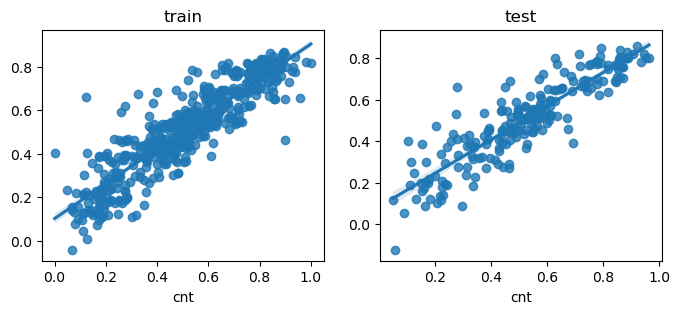

In [121]:
# Plotting regression plot to see the fitted line on both train and test dataset

plt.figure(figsize=[8,3])

plt.subplot(1,2,1)
sns.regplot( x=y_train, y=y_train_pred)
plt.title('train')

plt.subplot(1,2,2)
sns.regplot( x=y_test, y=y_test_pred)
plt.title('test')

plt.show()

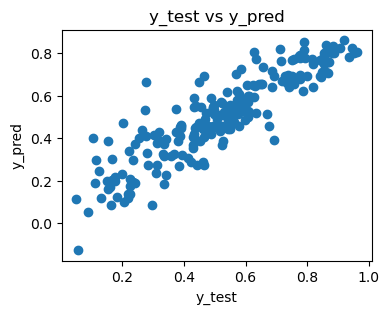

In [122]:
# Plotting scatter plot for test dataset

plt.figure(figsize=[4,3])
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## The equation for best fitted line is :

### cnt = 0.247 X yr - 0.073 X holiday - 0.146 X windspeed - 0.194 X season_spring + 0.071 X mnth_3 + 0.118 X mnth_5 + 0.146 X mnth_6 + 0.145 X mnth_8 + 0.182 X mnth_9 - 0.301 X weathersit_light_rain_snow - 0.088 X weathersit_mist_cloudy + 0.115 X mnth_7 + 0.105 X mnth_10

### We found that demand for bikes depends on following significant variables 
- yr, holiday, windspeed, season_spring, mnth_3, mnth_5, mnth_6, mnth_8, mnth_9, mnth_7, mnth_10, weathersit_light_rain_snow, weathersit_mist_cloudy
### Demand increases in the month mnth_3, mnth_5, mnth_6, mnth_8, mnth_9, mnth_7, mnth_10, yr.
### Demand decreases if its holiday, windspeed, season_spring, weathersit_light_rain_snow, mist_cloudy

# CONCLUSION & RECOMMENDATION :

### 1) Company seeks higher demand in the month of March, May, June, August, September, July and October.
### 2) Comapany has to be prepared for these months in the upcoming year.
### 3) Company can launch some kind of offer during holidays.
### 4) Company can implement some kind of strategies during spring season, light_rain_snow and       misty_cloudy season to engage more customers.